In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import pickle

In [2]:
# Network Architecture
ILS = 1 #Input layer size
NL, LS = 5, 10 # Number of hidden layers and their size

# Initialize weights
def init_w(ils=ILS, nl=NL, ls=LS):
    nu = [ils] + [ls] * nl
    w = []
    for l in range(nl):
        w.append([])
        for i in range(nu[l]):
            w[l].append([])
            for j in range(nu[l+1]):
                w[l][i].append(2*(np.random.uniform()-.5)**1)
    w.append([[(2*(np.random.uniform()-.5))**1 for i in range(nu[nl])]])

        
    return w

# Import weights
def import_w(file):
    with open(file, 'rb') as f:
        w = pickle.load(f)
    return w
    
# Compute output
def compute_output(invals, w, activation_fun):
    # Input layer
    cl = np.array(invals)
    # Hidden layers
    for l in range(len(w)-1):
        #print(len(w[l][0]))
        cl = np.array([np.sum([w[l][i][j]*cl[i] for i in range(len(cl))]) for j in range(len(w[l][0]))])
        if activation_fun=='tanh':
            cl = np.tanh(cl)
        elif activation_fun=='ReLU':
            cl=[cl_i if cl_i>0 else 0 for cl_i in cl]
        elif activation_fun=='leaky_ReLU':
            cl=[cl_i if cl_i>0 else 0.01*cl_i for cl_i in cl]
            
        
    return(np.sum([w[-1][i][0] * cl[i] for i in range(len(w[-1]))]))

In [3]:
NREP = 10
d_all = pd.DataFrame({'x1' : [], 'y': [], 'rep': []})
d_all_raw = pd.DataFrame({'x1' : [], 'y_raw': [], 'rep': []})

activation_function='tanh'


#load pickle with NN weights
filename = 'NN_weights_' + activation_function + '_NREP_10_.pickle'
weights = import_w('../data/backup/' + filename)

#load low-resolution non-normalized original data
low_res_data=pd.read_csv('../data/backup/' + 'Non_normalized_NN_function_'+ str(activation_function) + '_NREP_10_data.csv');
low_res_data=low_res_data.drop(['Unnamed: 0'], axis=1)

    
for rep in range(NREP):
    #load pickle with weights
    w=weights[rep]

    #Generate x
    step=0.001
    x1 = np.arange(-4, 4, step)

    #Generate y
    x1s, ys = [], []
    y = [compute_output([1, thisx1], w, activation_function) for thisx1 in x1]
    x1s=x1
    ys=y
    ys = np.array(ys)

    # Normalize y to [0, 1] with lower resolution data
    low_res_rep=low_res_data[low_res_data['rep']==rep]
    ys_low_res=np.array(low_res_rep.y_raw)
    ys_norm = (ys - min(ys_low_res)) / (max(ys_low_res) - min(ys_low_res) + 1e-15)
    

    #Put as dataframe
    d = pd.DataFrame({'x1' : x1s, 'y' : ys_norm, 'rep': rep})
    display(d)
    display(low_res_rep)
    d_all=pd.concat([d_all,d])
    
    #Save non-normalized version
    d_raw = pd.DataFrame({'x1' : x1s, 'y_raw' : ys, 'rep': rep})
    d_all_raw=pd.concat([d_all_raw,d_raw])

#Save to dataframe
save=True
if save==True:
    #with open('../Data/' + 'NN_weights_' + activation_function + '_NREP_' + str(NREP) + '_res_' + str(step) + '_' + '.pickle', 'wb') as f:
    #    pickle.dump(weights, f, protocol=None)

    d_all.to_csv('../data/generative_data/' + 'NN_function_' + activation_function + '_NREP_' + str(NREP) + '_res_' + str(step) + '_data.csv')
    d_all_raw.to_csv('../data/generative_data/' + 'Non_normalized_NN_function_' + activation_function + '_NREP_' + str(NREP) + '_res_' + str(step) + '_data.csv')

,x1,y,rep
0,-4.000,0.000000,0
1,-3.999,0.000007,0
2,-3.998,0.000013,0
3,-3.997,0.000020,0
4,-3.996,0.000027,0
...,...,...,...
7995,3.995,0.927488,0
7996,3.996,0.927456,0
7997,3.997,0.927424,0
7998,3.998,0.927392,0


,x1,y_raw,rep
0,-4.00,-0.602560,0.0
1,-3.95,-0.602157,0.0
2,-3.90,-0.601727,0.0
3,-3.85,-0.601268,0.0
4,-3.80,-0.600780,0.0
...,...,...,...
155,3.75,0.494271,0.0
156,3.80,0.492101,0.0
157,3.85,0.489996,0.0
158,3.90,0.487958,0.0


,x1,y,rep
0,-4.000,1.000000,1
1,-3.999,0.999970,1
2,-3.998,0.999940,1
3,-3.997,0.999909,1
4,-3.996,0.999879,1
...,...,...,...
7995,3.995,0.002590,1
7996,3.996,0.002594,1
7997,3.997,0.002597,1
7998,3.998,0.002600,1


,x1,y_raw,rep
160,-4.00,0.376607,1.0
161,-3.95,0.375329,1.0
162,-3.90,0.373968,1.0
163,-3.85,0.372518,1.0
164,-3.80,0.370973,1.0
...,...,...,...
315,3.75,-0.444130,1.0
316,3.80,-0.444004,1.0
317,3.85,-0.443875,1.0
318,3.90,-0.443745,1.0


,x1,y,rep
0,-4.000,1.000000,2
1,-3.999,0.999928,2
2,-3.998,0.999856,2
3,-3.997,0.999784,2
4,-3.996,0.999711,2
...,...,...,...
7995,3.995,0.673554,2
7996,3.996,0.673552,2
7997,3.997,0.673549,2
7998,3.998,0.673547,2


,x1,y_raw,rep
320,-4.00,0.068283,2.0
321,-3.95,0.065995,2.0
322,-3.90,0.063637,2.0
323,-3.85,0.061207,2.0
324,-3.80,0.058701,2.0
...,...,...,...
475,3.75,-0.136414,2.0
476,3.80,-0.136192,2.0
477,3.85,-0.136049,2.0
478,3.90,-0.135979,2.0


,x1,y,rep
0,-4.000,1.000000,3
1,-3.999,0.999932,3
2,-3.998,0.999863,3
3,-3.997,0.999795,3
4,-3.996,0.999726,3
...,...,...,...
7995,3.995,0.183158,3
7996,3.996,0.183121,3
7997,3.997,0.183084,3
7998,3.998,0.183048,3


,x1,y_raw,rep
480,-4.00,0.419057,3.0
481,-3.95,0.414475,3.0
482,-3.90,0.409579,3.0
483,-3.85,0.404348,3.0
484,-3.80,0.398756,3.0
...,...,...,...
635,3.75,-0.629358,3.0
636,3.80,-0.632009,3.0
637,3.85,-0.634603,3.0
638,3.90,-0.637139,3.0


,x1,y,rep
0,-4.000,0.001216,4
1,-3.999,0.001215,4
2,-3.998,0.001215,4
3,-3.997,0.001214,4
4,-3.996,0.001214,4
...,...,...,...
7995,3.995,0.999967,4
7996,3.996,0.999967,4
7997,3.997,0.999967,4
7998,3.998,0.999967,4


,x1,y_raw,rep
640,-4.00,-0.772410,4.0
641,-3.95,-0.772443,4.0
642,-3.90,-0.772476,4.0
643,-3.85,-0.772510,4.0
644,-3.80,-0.772545,4.0
...,...,...,...
795,3.75,0.773212,4.0
796,3.80,0.773206,4.0
797,3.85,0.773199,4.0
798,3.90,0.773191,4.0


,x1,y,rep
0,-4.000,0.988733,5
1,-3.999,0.988743,5
2,-3.998,0.988752,5
3,-3.997,0.988761,5
4,-3.996,0.988770,5
...,...,...,...
7995,3.995,-0.000222,5
7996,3.996,-0.000227,5
7997,3.997,-0.000232,5
7998,3.998,-0.000237,5


,x1,y_raw,rep
800,-4.00,0.110349,5.0
801,-3.95,0.110445,5.0
802,-3.90,0.110540,5.0
803,-3.85,0.110634,5.0
804,-3.80,0.110727,5.0
...,...,...,...
955,3.75,-0.094401,5.0
956,3.80,-0.094459,5.0
957,3.85,-0.094515,5.0
958,3.90,-0.094569,5.0


,x1,y,rep
0,-4.000,0.859712,6
1,-3.999,0.859782,6
2,-3.998,0.859851,6
3,-3.997,0.859921,6
4,-3.996,0.859991,6
...,...,...,...
7995,3.995,0.558583,6
7996,3.996,0.558650,6
7997,3.997,0.558717,6
7998,3.998,0.558784,6


,x1,y_raw,rep
960,-4.00,0.522612,6.0
961,-3.95,0.524404,6.0
962,-3.90,0.526178,6.0
963,-3.85,0.527934,6.0
964,-3.80,0.529674,6.0
...,...,...,...
1115,3.75,0.357528,6.0
1116,3.80,0.359669,6.0
1117,3.85,0.361713,6.0
1118,3.90,0.363662,6.0


,x1,y,rep
0,-4.000,0.006409,7
1,-3.999,0.006407,7
2,-3.998,0.006406,7
3,-3.997,0.006404,7
4,-3.996,0.006403,7
...,...,...,...
7995,3.995,1.022565,7
7996,3.996,1.023056,7
7997,3.997,1.023547,7
7998,3.998,1.024037,7


,x1,y_raw,rep
1120,-4.00,-0.881172,7.0
1121,-3.95,-0.881255,7.0
1122,-3.90,-0.881339,7.0
1123,-3.85,-0.881425,7.0
1124,-3.80,-0.881513,7.0
...,...,...,...
1275,3.75,0.148214,7.0
1276,3.80,0.182100,7.0
1277,3.85,0.214921,7.0
1278,3.90,0.246587,7.0


,x1,y,rep
0,-4.000,0.013793,8
1,-3.999,0.013771,8
2,-3.998,0.013749,8
3,-3.997,0.013726,8
4,-3.996,0.013704,8
...,...,...,...
7995,3.995,0.955176,8
7996,3.996,0.955135,8
7997,3.997,0.955094,8
7998,3.998,0.955053,8


,x1,y_raw,rep
1280,-4.00,-0.205417,8.0
1281,-3.95,-0.205970,8.0
1282,-3.90,-0.206519,8.0
1283,-3.85,-0.207061,8.0
1284,-3.80,-0.207593,8.0
...,...,...,...
1435,3.75,0.266885,8.0
1436,3.80,0.265928,8.0
1437,3.85,0.264957,8.0
1438,3.90,0.263971,8.0


,x1,y,rep
0,-4.000,0.000882,9
1,-3.999,0.000880,9
2,-3.998,0.000878,9
3,-3.997,0.000876,9
4,-3.996,0.000874,9
...,...,...,...
7995,3.995,0.998466,9
7996,3.996,0.998464,9
7997,3.997,0.998462,9
7998,3.998,0.998459,9


,x1,y_raw,rep
1440,-4.00,-0.094874,9.0
1441,-3.95,-0.094893,9.0
1442,-3.90,-0.094911,9.0
1443,-3.85,-0.094929,9.0
1444,-3.80,-0.094946,9.0
...,...,...,...
1595,3.75,0.095685,9.0
1596,3.80,0.095664,9.0
1597,3.85,0.095643,9.0
1598,3.90,0.095621,9.0


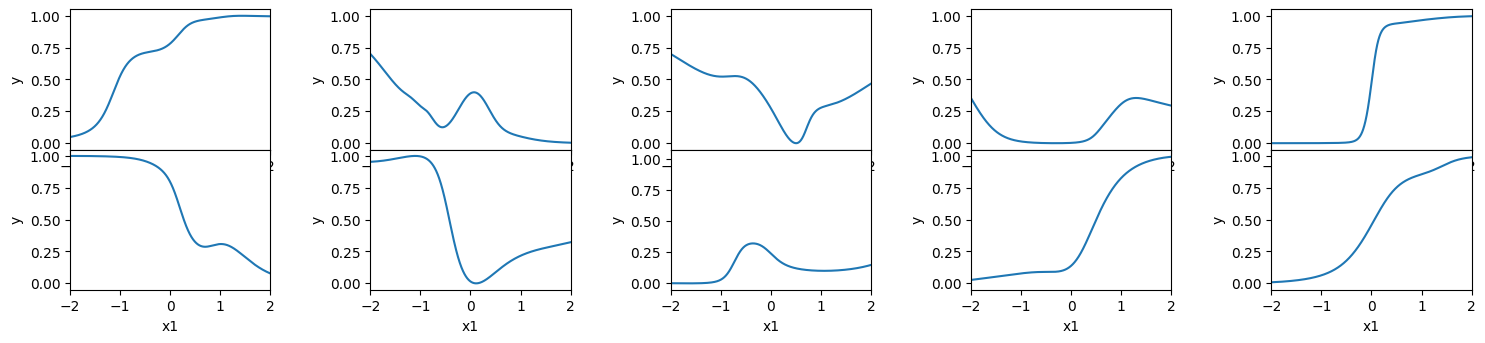

In [4]:
#PLOT -2,2

#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches                                                                                                                                                                        
width=40*cm;height=8*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]

rows=2;cols=5
gs=gridspec.GridSpec(rows,cols)
gs.update(left=0.1,right=0.99,bottom=0.08,top=0.97,wspace=0.5,hspace=0.0)

#Plot train rank (-2,2)
h=0
for r in range(rows):
    for c in range(cols):
        ax_rc=plt.subplot(gs[r,c])
        d=d_all[d_all['rep']==h]
        ax_rc=sns.lineplot(data=d, x='x1', y='y')
        ax_rc.set_xlim(-2,2)
        h+=1
plt.savefig('../results/seminal_data/' + 'NN_function_high_res_step' +str(step) + activation_function + 'ILS%d_NL%d_LS%d'  %(ILS, NL,  LS) + '.png', dpi=300)


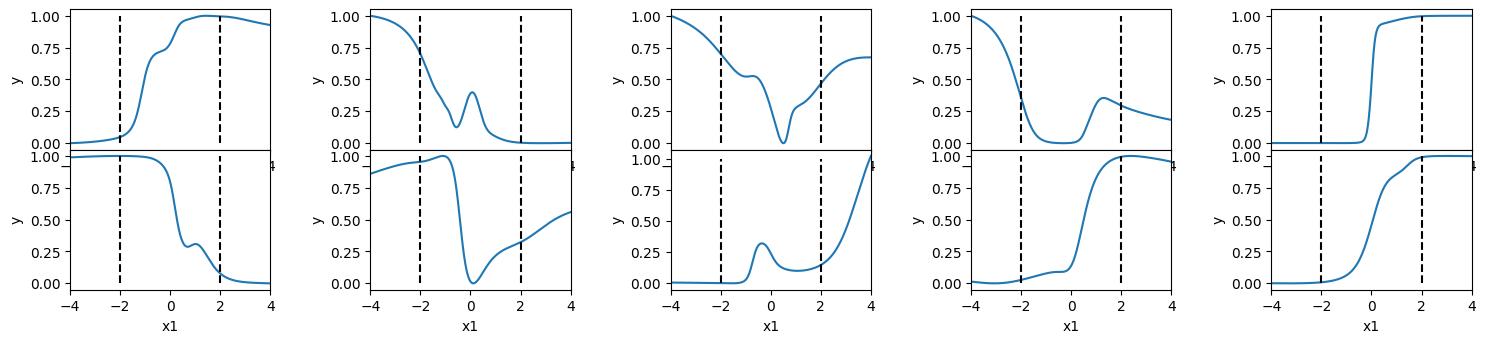

In [5]:
#PLOT FULL RANK (-4,4)

#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches                                                                                                                                                                        
width=40*cm;height=8*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]


h=0
for r in range(rows):
    for c in range(cols):
        ax_rc=plt.subplot(gs[r,c])
        d=d_all[d_all['rep']==h]
        ax_rc=sns.lineplot(data=d, x='x1', y='y')
        ax_rc.vlines(x=[-2, 2], ymin=0, ymax=1, color='k',linestyle='--')
        ax_rc.set_xlim(-4,4)
        h+=1
plt.savefig('../results/seminal_data/' + 'NN_function_high_res_step_' +str(step) + activation_function + 'ILS%d_NL%d_LS%d_full_rank'  %(ILS, NL,  LS) + '.png', dpi=300)